In [ ]:
# My EDA is which NHL Season had the best season, in terms of points, PPG, Assists, APG, Goals, GPG, etc.

,Rk,Player,GP,G,A,PTS,Season,PPG,GPG,APG
10478,859,Joe Thornton\thornjo01,81,29,96,125,2006,1.543210,0.358025,1.185185
10479,860,Jaromir Jagr\jagrja01,82,54,69,123,2006,1.500000,0.658537,0.841463
8794,1,Sidney Crosby\crosbsi01,79,36,84,120,2009,1.518987,0.455696,1.063291
9652,1,Sidney Crosby\crosbsi01,79,36,84,120,2007,1.518987,0.455696,1.063291
8795,2,Joe Thornton\thornjo01,82,22,92,114,2009,1.390244,0.268293,1.121951
...,...,...,...,...,...,...,...,...,...,...
7004,827,Perttu Lindgren\lindgpe01,1,0,0,0,2010,0.000000,0.000000,0.000000
7005,828,Charles Linglet\linglch01,5,0,0,0,2010,0.000000,0.000000,0.000000
7006,829,Corey Locke\lockeco01,3,0,0,0,2010,0.000000,0.000000,0.000000
7007,830,Andrei Loktionov\loktian01,1,0,0,0,2010,0.000000,0.000000,0.000000


,Season,G,A,PTS,PPG,GPG,APG
1,2006,8.891278,15.293907,24.185185,0.383905,0.141669,0.242236
2,2007,8.573850,14.926150,23.500000,0.365811,0.135583,0.230228
4,2009,8.082616,14.009753,22.092369,0.351760,0.128411,0.223350
3,2008,7.853286,13.484742,21.338028,0.340277,0.123465,0.216812
5,2010,7.739477,13.329920,21.069397,0.338796,0.122951,0.215845
8,2013,4.554231,7.827175,12.381406,0.335424,0.122724,0.212700
6,2011,7.543210,12.891134,20.434343,0.330085,0.121248,0.208837
9,2014,7.417607,12.678330,20.095937,0.327854,0.122114,0.205740
7,2012,7.319911,12.526846,19.846756,0.324252,0.119109,0.205143
10,2015,7.425170,12.748299,20.173469,0.323915,0.116825,0.207090


<AxesSubplot:xlabel='Season', ylabel='PTS'>

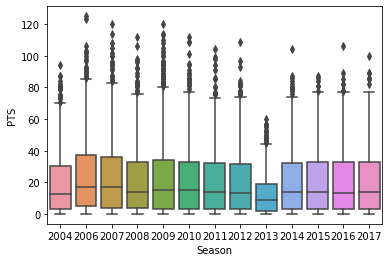

In [51]:
import pandas as pd
import seaborn as sns
import numpy as np
import os
import matplotlib.pyplot as plt

from scripts import project_functions as pf # This is called a relative import

df = pf.load_and_process('data/nhlStats.csv', 'data/playerData.csv')
dfpts = df.sort_values(by = 'PTS', ascending = False)
display(dfpts)
dfSorted = df.groupby('Season').mean().reset_index()
dfSorted.pop('Rk')
dfSorted.pop('GP')
dfSorted = dfSorted.sort_values(by='PPG', ascending = False)
display(dfSorted)
sns.boxplot(x='Season', y='PTS', data=df)

In [ ]:
# Using a boxplot, we can see that in 2006, the highest points in a season occured and we can verify that by looking up the max PTS.
# Which results in Joe Thorton have 125 points.
#We can also see that the year 2013 was very clearly an outlier which is true since there was a lockout which resulted in only 48 games played. 
# We will also be taking a look at the average PPG, GPG, APG to help determine which season contributed the most offence.

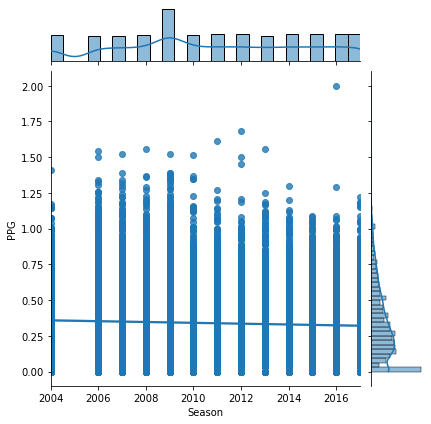

In [14]:
sns.jointplot(x='Season', y='PPG', data=df, kind='reg')

In [ ]:
# This plot shows the average PPG vs Season, and shows that the PPG is on a downward tragectory hence, showing that the eariler seasons is more productive in terms of points
# this also is confirmed with the top graph showing that 2006 had the highest PPG which is true. Where as 2009 had the most variance in the PPG category
# The graph on the right side also dictates that most players had either zero ppg
# or they had around 0.32 PPG.



<AxesSubplot:xlabel='PTS', ylabel='Season'>

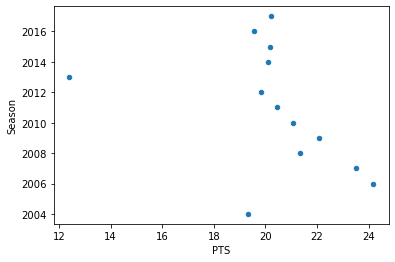

In [44]:
import pandas as pd
import seaborn as sns
import numpy as np
import os
import matplotlib.pyplot as plt

from scripts import project_functions as pf # This is called a relative import

df = pf.load_and_process('data/nhlStats.csv', 'data/playerData.csv')
dfSorted = df.groupby('Season').mean().reset_index()
dfSorted.pop('Rk')
dfSorted.plot(kind='scatter', x='PTS', y='Season')

In [ ]:
#This continues to push the narative that 2006 had the best year of points in terms of PPG, 2009 is also an outlier but it helps to conclude that earlier hockey (pre 2010's) was 
# contributing to offence hence the better seasons. but 2009 does not follow this tragectory. This also shows that 2006 had the best average points resulting in just over 24
# points in the season.


In [ ]:
#Now we will create a standard marking criteria for the G, PTS, A, to help conclude the best year of Hockey in terms of points, G, A, PPG, GPG, APG. We will be using both
# Assists, Goals, Points, PPG, GPG, APG to help show the best season

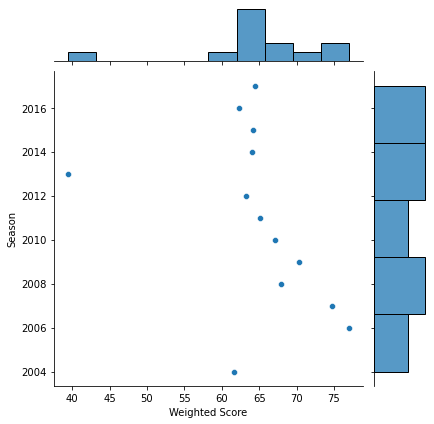

In [35]:
# Using G, A, PTS with a more weighted Goals than Assits because you can recieve as many as 2 assists on a single goal, so Goals will become more heavily weighted 40, 30, 30
import pandas as pd
import seaborn as sns
import numpy as np
import os
import matplotlib.pyplot as plt

from scripts import project_functions as pf # This is called a relative import

df = pf.load_and_process('data/nhlStats.csv', 'data/playerData.csv')
dfSorted = df.groupby('Season').mean().reset_index()
dfSorted.pop('Rk')

dfSorted = dfSorted.sort_values(by='PTS', ascending = False)
dfSorted['Weighted Score'] = dfSorted.apply(lambda row: ((row.G/20)*40 + (row.A/20)*30 + (row.PTS/20)*30), axis = 1)
ax = sns.jointplot(x='Weighted Score', y='Season', data=dfSorted)
display(ax)

In [ ]:
#This is showing that many of the past seasons have contributed similar values for offence generated however the earlier seasons such as 2006 and 2007 have contributed 
# much more scoring in terms of G,A,Pts hence this is another reason why 2006 was the most Offensive year in terms of points.


,Season,GP,G,A,PTS,PPG,GPG,APG,Weighted Score
1,2006,52.787336,8.891278,15.293907,24.185185,0.383905,0.141669,0.242236,24.450962
2,2007,53.487893,8.573850,14.926150,23.500000,0.365811,0.135583,0.230228,23.304477
4,2009,50.781985,8.082616,14.009753,22.092369,0.351760,0.128411,0.223350,22.389721
3,2008,51.955399,7.853286,13.484742,21.338028,0.340277,0.123465,0.216812,21.651298
5,2010,50.366325,7.739477,13.329920,21.069397,0.338796,0.122951,0.215845,21.557287
6,2011,49.676768,7.543210,12.891134,20.434343,0.330085,0.121248,0.208837,21.017604
12,2017,49.858108,7.549550,12.656532,20.206081,0.322859,0.119983,0.202877,20.571388
10,2015,50.197279,7.425170,12.748299,20.173469,0.323915,0.116825,0.207090,20.603124
9,2014,49.972912,7.417607,12.678330,20.095937,0.327854,0.122114,0.205740,20.892346
7,2012,49.524609,7.319911,12.526846,19.846756,0.324252,0.119109,0.205143,20.646182


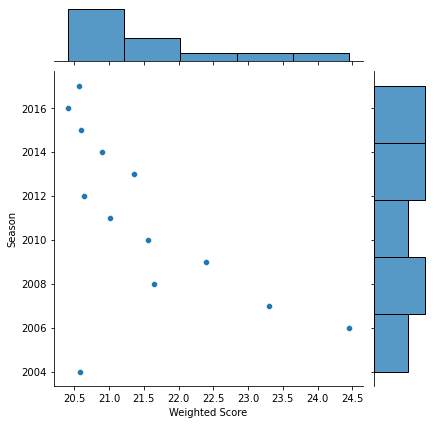

In [39]:
# We will now use PPG, GPG, APG to show the averages of each season to help validate our findings

import pandas as pd
import seaborn as sns
import numpy as np
import os
import matplotlib.pyplot as plt

from scripts import project_functions as pf # This is called a relative import

df = pf.load_and_process('data/nhlStats.csv', 'data/playerData.csv')
dfSorted = df.groupby('Season').mean().reset_index()
dfSorted.pop('Rk')

dfSorted = dfSorted.sort_values(by='PTS', ascending = False)
dfSorted['Weighted Score'] = dfSorted.apply(lambda row: ((row.GPG/1)*40 + (row.APG/1)*30 + (row.PPG/1)*30), axis = 1)
display(dfSorted)
ax = sns.jointplot(x='Weighted Score', y='Season', data=dfSorted)
display(ax)



In [ ]:
# This also concludes that the 2006 Season was infact the most offencive season in terms of points, PPG, Assists, APG, Goals, GPG and has been proven with countless plots and 
# data

In [ ]:
# Concluding our EDA, the objective of this was to determine which season had the best offence contributed in terms of Goals, Assists, Points, PPG, GPG, APG. We were able 
# to determine that the best season in terms of offence was infact 2006, with Joe Thorton leading the league in points with 125, which was the most in the league from
# 2004-2017. We continued to learn that using PPG and PTS that clearly 2006 was the most productive in that sense. To furter prove that 2006 was infact the most productive
# season, a mathematical forumula was used with Goals worth 40$, Assists worth 30% and Points worth 30%. Goals were favoured more since you can only have one goal scorer
# per point while you can have as many as 2 Assists given out per goal. Hence more goals means more offence so it was weighted more. The same mathematical formula was 
# applied to PPG, GPG and APG, Which showed very similar results and was enough evidence to conclude that 2006 was the most offencive year in terms of Points, Goals,
# Assists, Points per Game, Assists per Game, and Goals per Game.